In [30]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

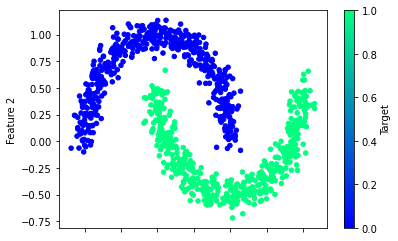

In [31]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [33]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split


In [35]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [36]:
# Create the Keras Sequential model
nn_mmodel = tf.keras.models.Sequential()
# Add our first Dense layer, including the input layer
nn_mmodel.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))
# Add the output layer that uses a probability activation function
nn_mmodel.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [37]:
# Compile the Sequential model together and customize metrics
nn_mmodel.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [38]:
# Training the model with the nonlinear data
model_moon = nn_mmodel.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 840us/step - loss: 0.7527 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 896us/step - loss: 0.7405 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 875us/step - loss: 0.7309 - accuracy: 0.4213
Epoch 4/100
24/24 [==============================] - 0s 845us/step - loss: 0.7227 - accuracy: 0.4373
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7157 - accuracy: 0.5053
Epoch 6/100
24/24 [==============================] - 0s 864us/step - loss: 0.7099 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 964us/step - loss: 0.7042 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 821us/step - loss: 0.6910 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 931us/step - loss: 0.6829 - accuracy: 

24/24 [==============================] - 0s 1ms/step - loss: 0.3049 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 997us/step - loss: 0.3029 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 997us/step - loss: 0.3020 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 954us/step - loss: 0.3011 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3001 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 997us/step - loss: 0.2984 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 868us/step - loss: 0.2975 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8920
Epo

<AxesSubplot:>

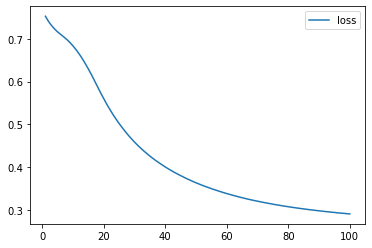

In [39]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

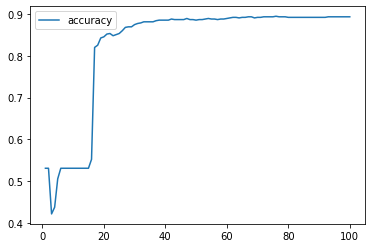

In [40]:

# Plot the accuracy
history_df.plot(y="accuracy")
